In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [22]:
data = pd.read_csv('Hot 100.csv')
data

,chart_position,chart_date,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url
0,84,1990-05-05,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,1,NaN,NaN,84,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
1,78,1990-05-12,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,2,1.0,84.0,78,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
2,68,1990-05-19,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,3,2.0,78.0,68,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
3,60,1990-05-26,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,4,3.0,68.0,60,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
4,58,1990-06-02,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,5,4.0,60.0,58,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338390,99,2001-02-10,www.memory,Alan Jackson,www.memoryAlan Jackson,1.0,15,14.0,89.0,45,99,2000-11-04,https://www.billboard.com/charts/hot-100/2001-...
338391,66,1958-12-13,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus...,1.0,1,NaN,NaN,66,66,1958-12-13,https://www.billboard.com/charts/hot-100/1958-...
338392,53,1958-12-20,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus...,1.0,2,1.0,66.0,53,66,1958-12-13,https://www.billboard.com/charts/hot-100/1958-...
338393,47,1958-12-27,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus...,1.0,3,2.0,53.0,47,66,1958-12-13,https://www.billboard.com/charts/hot-100/1958-...


In [3]:
data.head()

,chart_position,chart_date,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url
0,84,1990-05-05,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,1,NaN,NaN,84,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
1,78,1990-05-12,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,2,1.0,84.0,78,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
2,68,1990-05-19,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,3,2.0,78.0,68,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
3,60,1990-05-26,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,4,3.0,68.0,60,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
4,58,1990-06-02,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,5,4.0,60.0,58,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...


In [4]:
# Data Preprocessing

# Convert 'chart_date' and 'chart_debut' columns to datetime
data['chart_date'] = pd.to_datetime(data['chart_date'])
data['chart_debut'] = pd.to_datetime(data['chart_debut'])

In [5]:
# Fill missing values in 'consecutive_weeks' and 'previous_week'
data['consecutive_weeks'].fillna(0, inplace=True)
data['previous_week'].fillna(0, inplace=True)

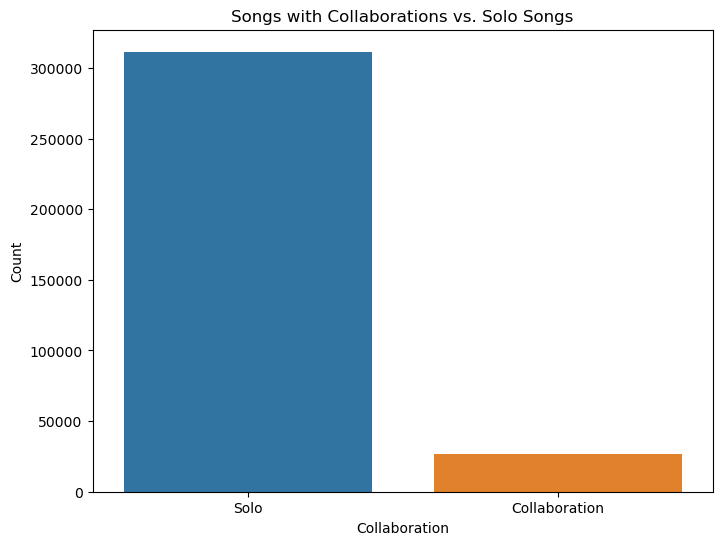

In [27]:
# Data Visualization

# Bar Chart - Songs with Collaborations vs. Solo Songs
collaboration_counts = data['performer'].str.contains('&').value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=collaboration_counts.index, y=collaboration_counts.values)
plt.title('Songs with Collaborations vs. Solo Songs')
plt.xlabel('Collaboration')
plt.ylabel('Count')
plt.xticks([0, 1], ['Solo', 'Collaboration'])
plt.show()

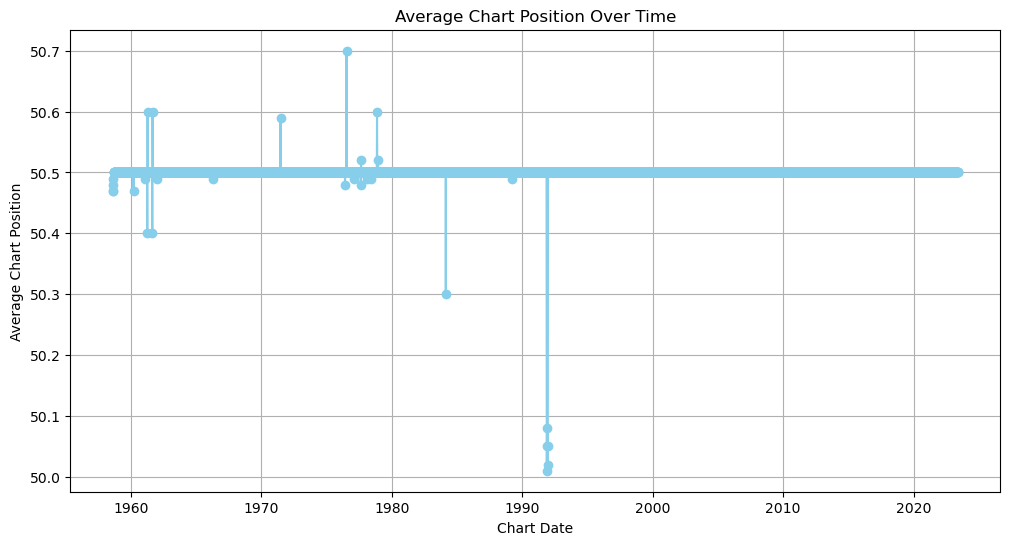

In [24]:
# Time Series Analysis of Chart Position:
# Analyze how the chart position of songs changes over time to identify trends in chart performance.

# Assuming you have a DataFrame 'data' with columns 'chart_date' and 'chart_position'
# Convert 'chart_date' to datetime
data['chart_date'] = pd.to_datetime(data['chart_date'])

# Group data by 'chart_date' and calculate the average chart position
average_position = data.groupby('chart_date')['chart_position'].mean()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(average_position.index, average_position.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Chart Position Over Time')
plt.xlabel('Chart Date')
plt.ylabel('Average Chart Position')
plt.grid(True)
plt.show()


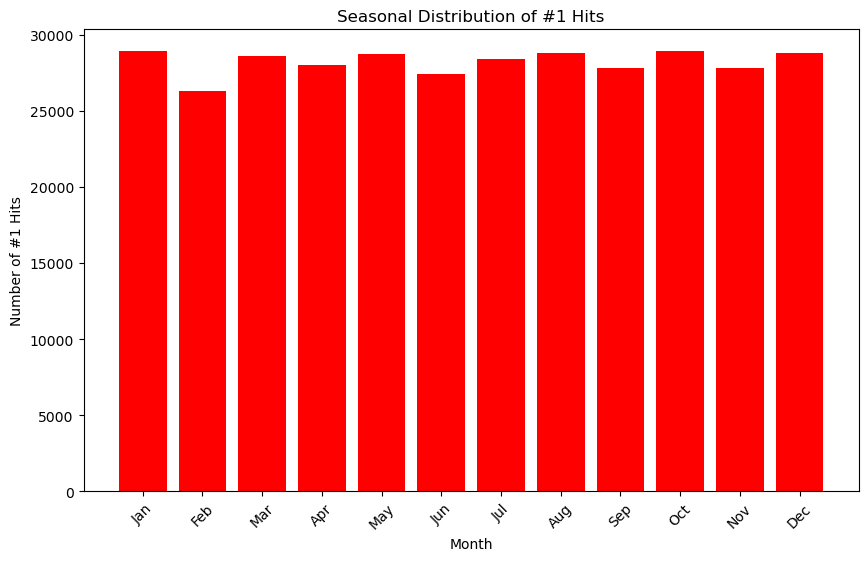

In [21]:
# Seasonal Analysis:
# Investigate whether there are seasonal trends in chart success by creating a bar chart that shows the number of #1 hits in each season.

# Extract the month from the 'chart_date' column
data['chart_month'] = data['chart_date'].dt.month

# Create a bar chart showing the distribution of #1 hits by season
season_counts = data['chart_month'].value_counts().sort_index()
season_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(season_names, season_counts, color='red')
plt.title('Seasonal Distribution of #1 Hits')
plt.xlabel('Month')
plt.ylabel('Number of #1 Hits')
plt.xticks(rotation=45)
plt.show()


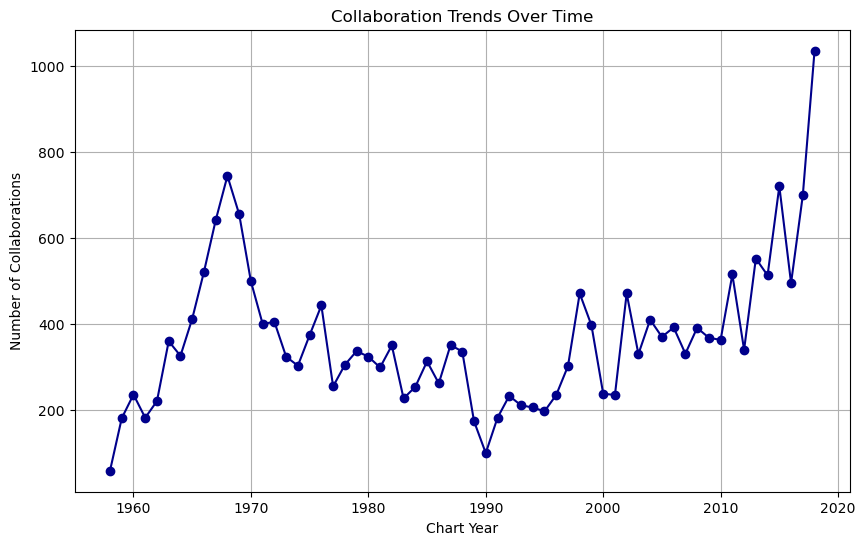

In [19]:
# Collaboration Trends Over Time: Visualize how the number of collaborations
# in chart-topping songs has evolved over the years.

# Assuming you have a DataFrame 'data' with columns 'chart_date' and 'performer'
# Convert 'chart_date' to datetime
data['chart_date'] = pd.to_datetime(data['chart_date'])

# Extract the year from 'chart_date'
data['chart_year'] = data['chart_date'].dt.year

# Group data by 'chart_year' and count the number of collaborations
collaboration_counts = data[data['performer'].str.contains('&')].groupby('chart_year').size()

# Filter data to include only years up to 2018
collaboration_counts = collaboration_counts[collaboration_counts.index <= 2018]

# Create a line graph
plt.figure(figsize=(10, 6))
collaboration_counts.plot(kind='line', marker='o', color='darkblue', linestyle='-')
plt.title('Collaboration Trends Over Time')
plt.xlabel('Chart Year')
plt.ylabel('Number of Collaborations')
plt.grid(True)
plt.show()
